# COVID-19 Status (Colombia)

##### Limpieza y ajuste de datos (Desarrollador)*

In [1]:
# Libraries import
from datetime import datetime
from plotly.offline import init_notebook_mode, iplot
import requests
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from googletrans import Translator
import matplotlib.pyplot as plt
import statsmodels.api as sn

In [2]:
# Dataset import - 'Datos abiertos COVID-19 (Colombia)'
data = pd.DataFrame.from_dict(requests.get('https://www.datos.gov.co/resource/gt2j-8ykr.json?$limit=999999999').json())
#data

In [3]:
# Data cleaning and adjusting

# FE DE ERRATAS (2020-05-03): --------------------------------------------------------------------------------------------------------------------------------------------------
#data.loc[(data['Edad'].str.contains('-   -'))] = None
    
data = data[~data['edad'].str.contains('-   -')]
#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#translator = Translator()

data.columns = ['Id de caso', 'Fecha de notificación', 'Código DIVIPOLA', 'Ciudad de ubicación', 'Departamento', 'Estado', 'Edad', 'Sexo', 'Tipo', 'Severidad','País de procedencia', 'Fecha de inicio de síntomas', 'Fecha de diagnóstico', 'Fecha de recuperación', 'Fecha de reporte web', 'Tipo de recuperación', 'Código departamento', 'Código país', 'Pertenecia Étnica', 'Fecha de defunción', 'Nombre Grupo Étnico']

for column in ['Ciudad de ubicación', 'Estado', 'Sexo', 'Tipo', 'Severidad', 'País de procedencia']:
    data[column] = data[column].str.capitalize()
    
for column in ['Fecha de notificación', 'Fecha de inicio de síntomas', 'Fecha de defunción', 'Fecha de diagnóstico', 'Fecha de recuperación', 'Fecha de reporte web']:
       data[column] = data[column].str.slice(0,10).replace(r'(\d+)-(\d+)-(\d+)', r'\1-\2-\3', regex=True).apply(lambda x: pd.to_datetime(x, dayfirst=True, errors='ignore'))

data.loc[(data['Edad'].str.contains('[a-zA-Z]+', regex=True)), 'Edad'] = 0
data['Clasificación de edad'] = pd.cut(x=data['Edad'].apply(lambda x: float(x)), bins=[-np.inf,10,20,30,40,50,60,70,80,90,np.inf], include_lowest=True, labels=['0 - 10', '10 - 20', '20 - 30', '30 - 40', '40 - 50', '50 - 60', '60 - 70', '70 - 80', '80 - 90', '90 - 100+'])

#data['País de procedencia'] = data['País de procedencia'].apply(Translator().translate, src='es', dest='en').apply(getattr, args=('text',))

data = data[['Id de caso', 'Fecha de reporte web', 'Fecha de diagnóstico', 'Fecha de notificación', 'Fecha de inicio de síntomas', 'Fecha de recuperación', 'Fecha de defunción', 'Ciudad de ubicación', 'Departamento', 'Severidad', 'Estado', 'Edad', 'Clasificación de edad', 'Sexo', 'Pertenecia Étnica', 'Nombre Grupo Étnico', 'Tipo', 'Tipo de recuperación', 'País de procedencia', 'Código departamento', 'Código país', 'Código DIVIPOLA']]
data = data.set_index('Id de caso')

date = datetime.today().strftime('%Y-%m-%d')
data.to_csv(f'./Datasets/COVID-19 Status (Colombia) [{date}].csv', index = True)

def numbers(div):
    for i in range(0, len(ax.patches)//div, 1):
        height = 0
        for j in range(0, div, 1):
            height += ax.patches[j*(len(ax.patches)//div)+i].get_height()
        ax.text(ax.patches[i].get_x()+(ax.patches[i].get_width()/10),height+(height/100)+10, int(height), fontsize=7, color='dimgrey', rotation=90)

def numbers_H(div):
    for i in range(0, len(ax.patches)//div, 1):
        width = 0
        for j in range(0, div, 1):
            width += ax.patches[j*(len(ax.patches)//div)+i].get_width()
        ax.text(width+(width/100)+10,ax.patches[i].get_y()+(ax.patches[i].get_height()/10), int(width), fontsize=7, color='dimgrey', rotation=0)

In [4]:
# Test

#data['País de procedencia'].unique().apply(lambda x: Translator().translate(x, src='es', dest='en').text)
#Translator().translate('España', src='es', dest='en').text

In [5]:
# In-line plots libraries import

%matplotlib inline
init_notebook_mode(connected = True)

## Análisis Dataset - COVID-19 (Colombia)

### - Datos Abiertos COVID-19 (Colombia)

In [6]:
data

Fecha de reporte web Fecha de diagnóstico Fecha de notificación  \
Id de caso                                                                   
1                    2020-03-06           2020-03-06            2020-03-02   
2                    2020-03-09           2020-03-09            2020-03-06   
3                    2020-03-09           2020-03-09            2020-03-07   
4                    2020-03-11           2020-03-11            2020-03-09   
5                    2020-03-11           2020-03-11            2020-03-09   
...                         ...                  ...                   ...   
233577               2020-07-24           2020-07-23            2020-07-14   
233578               2020-07-24           2020-07-23            2020-07-14   
233579               2020-07-24           2020-07-23            2020-07-14   
233580               2020-07-24           2020-07-23            2020-07-20   
233581               2020-07-24           2020-07-23            2020-07-14   

           Fecha de inicio de síntomas Fecha de recuperación  \
Id de caso                                                     
1                  2020-02-27 00:00:00            2020-03-13   
2                  2020-03-04 00:00:00            2020-03-19   
3                  2020-02-29 00:00:00            2020-03-15   
4                  2020-03-06 00:00:00            2020-03-26   
5                  2020-03-08 00:00:00            2020-03-23   
...                                ...                   ...   
233577             2020-07-14 00:00:00                   NaT   
233578             2020-07-14 00:00:00                   NaT   
233579             2020-07-14 00:00:00                   NaT   
233580             2020-07-20 00:00:00                   NaT   
233581             2020-07-14 00:00:00                   NaT   

           Fecha de defunción  Ciudad de ubicación     Departamento Severidad  \
Id de caso                                                                      
1                         NaT          Bogotá d.c.      Bogotá D.C.      Leve   
2                         NaT  Guadalajara de buga  Valle del Cauca      Leve   
3                         NaT             Medellín        Antioquia      Leve   
4                         NaT             Medellín        Antioquia      Leve   
5                         NaT             Medellín        Antioquia      Leve   
...                       ...                  ...              ...       ...   
233577                    NaT          Bogotá d.c.      Bogotá D.C.      Leve   
233578                    NaT          Bogotá d.c.      Bogotá D.C.      Leve   
233579                    NaT          Bogotá d.c.      Bogotá D.C.      Leve   
233580                    NaT          Bogotá d.c.      Bogotá D.C.      Leve   
233581                    NaT          Bogotá d.c.      Bogotá D.C.      Leve   

                Estado  ... Clasificación de edad Sexo Pertenecia Étnica  \
Id de caso              ...                                                
1           Recuperado  ...               10 - 20    F              Otro   
2           Recuperado  ...               30 - 40    M              Otro   
3           Recuperado  ...               40 - 50    F              Otro   
4           Recuperado  ...               50 - 60    M              Otro   
5           Recuperado  ...               20 - 30    M              Otro   
...                ...  ...                   ...  ...               ...   
233577            Casa  ...               20 - 30    F               NaN   
233578            Casa  ...               40 - 50    M               NaN   
233579            Casa  ...               40 - 50    M               NaN   
233580            Casa  ...               30 - 40    F               NaN   
233581            Casa  ...               70 - 80    M               NaN   

           Nombre Grupo Étnico         Tipo Tipo de recuperación  \
Id de caso                                          

### - Mapa de influencia - COVID-19 (Colombia) [Beta]

In [7]:
map_data = dict(
    type = 'choropleth',
    locations = data['País de procedencia'],
    locationmode = 'country names',
    colorscale = 'viridis',
    z = data['País de procedencia'].value_counts().tolist())

geo_map = go.Figure(data=[map_data])
iplot(geo_map)

### - Casos confirmados VS Departamento (Sexo)

In [8]:
data.groupby(['Departamento', 'Sexo']).size().unstack().fillna(0)

Sexo                                                    F      M
Departamento                                                    
Amazonas                                             1041   1438
Antioquia                                            9600  12322
Arauca                                                 37    137
Archipiélago de San Andrés Providencia y Santa ...     10     23
Atlántico                                            9456  10761
Barranquilla D.E.                                   12353  14435
Bogotá D.C.                                         38180  39709
Bolívar                                               887   1103
Boyacá                                                365    369
Buenaventura D.E.                                     730   1254
Caldas                                                296    287
Caquetá                                               245    244
Cartagena D.T. y C.                                  6303   7825
Casanare                                               82    120
Cauca                                                 606    810
Cesar                                                1002   1365
Chocó                                                1293   1494
Cundinamarca                                         3372   3453
Córdoba                                              1708   1750
Guainía                                                 6      8
Guaviare                                                9     64
Huila                                                 330    316
La Guajira                                            816    880
Magdalena                                             882    943
Meta                                                  539   1609
Nariño                                               2929   3532
Norte de Santander                                    580    808
Putumayo                                              226    269
Quindío                                               126    109
Risaralda                                             657    577
Santa Marta D.T. y C.                                1449   1555
Santander                                             953   1450
Sucre                                                2276   2698
Tolima                                                646   1339
Valle del Cauca                                      8517   9915
Vaupés                                                 27     34
Vichada                                                 1      1

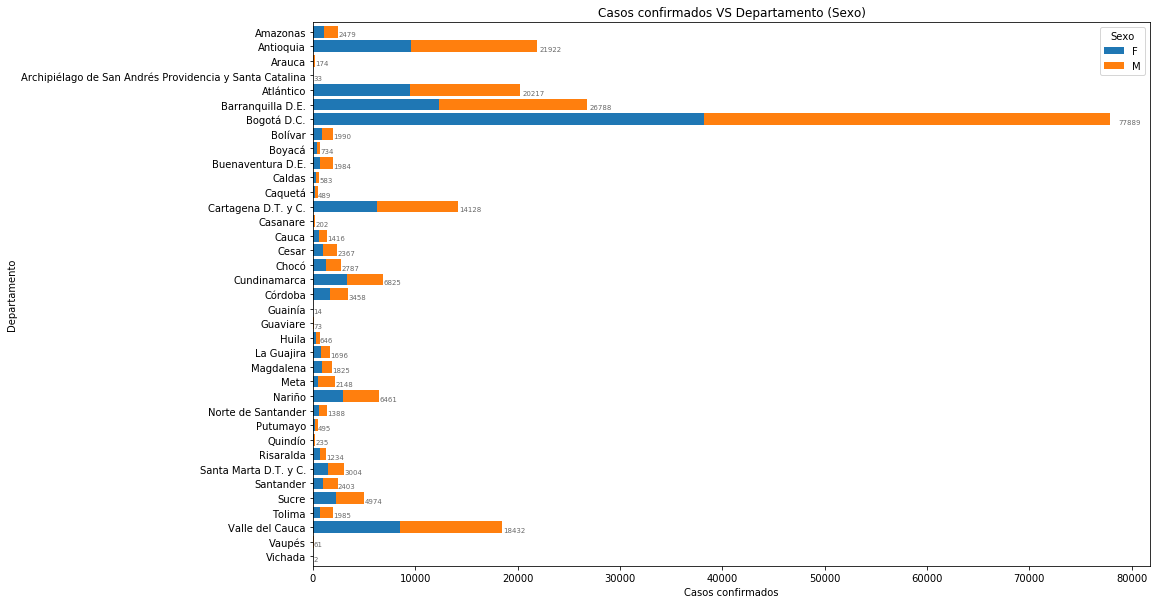

In [9]:
ax = data.groupby(['Departamento', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Departamento (Clasificación de edad)

In [10]:
data.groupby(['Departamento', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad                               0 - 10  10 - 20  20 - 30  \
Departamento                                                                   
Amazonas                                               129      447      509   
Antioquia                                              776     1568     5869   
Arauca                                                   7       35       68   
Archipiélago de San Andrés Providencia y Santa ...       0        1        9   
Atlántico                                              874     1501     4421   
Barranquilla D.E.                                     1019     1670     5883   
Bogotá D.C.                                           3483     6038    17850   
Bolívar                                                 90      188      437   
Boyacá                                                  45       66      153   
Buenaventura D.E.                                       42      275      456   
Caldas                                                  19       38      140   
Caquetá                                                 13       30      151   
Cartagena D.T. y C.                                    586     1005     3251   
Casanare                                                10        9       56   
Cauca                                                   66      126      334   
Cesar                                                  172      218      567   
Chocó                                                  120      237      643   
Cundinamarca                                           338      496     1560   
Córdoba                                                118      177      706   
Guainía                                                  0        2        4   
Guaviare                                                 1       26       16   
Huila                                                   39       62      126   
La Guajira                                              89      167      381   
Magdalena                                               96      134      329   
Meta                                                    34      144      688   
Nariño                                                 309      575     1510   
Norte de Santander                                      50       59      329   
Putumayo                                                11       33      138   
Quindío                                                  8       14       39   
Risaralda                                               83      112      277   
Santa Marta D.T. y C.                                  123      205      661   
Santander                                               88      202      604   
Sucre                                                  207      361     1036   
Tolima                                                  83      118      639   
Valle del Cauca                                        641     1288     4187   
Vaupés                                                   4        5       19   
Vichada                                                  0        1        0   

Clasificación de edad                               30 - 40  40 - 50  50 - 60  \
Departamento                                                                    
Amazonas                                                479      333      271   
Antioquia                                              5567     3394     2529   
Arauca                                                   42       12        6   
Archipiélago de San Andrés Providencia y Santa ...       11        7        3   
Atlántico                                              4747     3197     2627   
Barranquilla D.E.                                      6377     4185     3604   
Bogotá D.C.                                           16995    12512    10550   
Bolívar                                                 475      286      179   
Boyacá                                                  135      115 

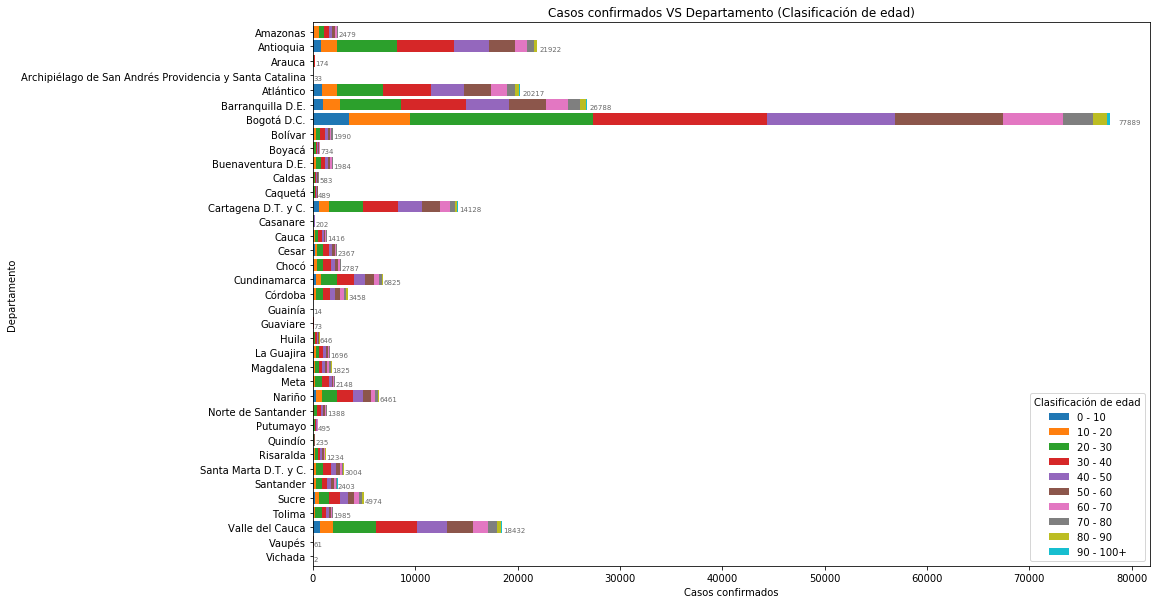

In [11]:
ax = data.groupby(['Departamento', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Departamento (Estado)

In [12]:
data.groupby(['Departamento', 'Estado']).size().unstack().fillna(0)

Estado                                                 Casa  Fallecido  \
Departamento                                                             
Amazonas                                               62.0      101.0   
Antioquia                                           14494.0      301.0   
Arauca                                                 59.0        1.0   
Archipiélago de San Andrés Providencia y Santa ...      5.0        0.0   
Atlántico                                            5741.0      951.0   
Barranquilla D.E.                                    7294.0     1381.0   
Bogotá D.C.                                         38670.0     2000.0   
Bolívar                                               675.0       90.0   
Boyacá                                                261.0       24.0   
Buenaventura D.E.                                     281.0      130.0   
Caldas                                                281.0        7.0   
Caquetá                                               375.0        8.0   
Cartagena D.T. y C.                                  3503.0      438.0   
Casanare                                               83.0        4.0   
Cauca                                                 675.0       43.0   
Cesar                                                 873.0       46.0   
Chocó                                                 731.0       86.0   
Cundinamarca                                         2889.0      161.0   
Córdoba                                              1683.0      404.0   
Guainía                                                 0.0        1.0   
Guaviare                                               27.0        0.0   
Huila                                                 234.0       18.0   
La Guajira                                            838.0       98.0   
Magdalena                                             569.0      175.0   
Meta                                                  638.0       26.0   
Nariño                                               2275.0      190.0   
Norte de Santander                                    854.0       54.0   
Putumayo                                              366.0       22.0   
Quindío                                                37.0        6.0   
Risaralda                                             543.0       24.0   
Santa Marta D.T. y C.                                1306.0      126.0   
Santander                                            1237.0       59.0   
Sucre                                                2355.0      302.0   
Tolima                                                687.0       38.0   
Valle del Cauca                                      6697.0      659.0   
Vaupés                                                 31.0        1.0   
Vichada                                                 0.0        0.0   

Estado                                              Hospital  Hospital uci  \
Departamento                                                                 
Amazonas                                                12.0           6.0   
Antioquia                                              953.0         149.0   
Arauca                                                   6.0           2.0   
Archipiélago de San Andrés Providencia y Santa ...       0.0           0.0   
Atlántico                                              722.0         104.0   
Barranquilla D.E.                                      981.0         120.0   
Bogotá D.C.                                           4538.0         335.0   
Bolívar                                                109.0          10.0   
Boyacá                                                  53.0           5.0   
Buenaventura D.E.                                      118.0          27.0   
Caldas                                                  26.0           9.0   
Caquetá                                                 46.0           4.0   
Cartagena D.T. y C.  

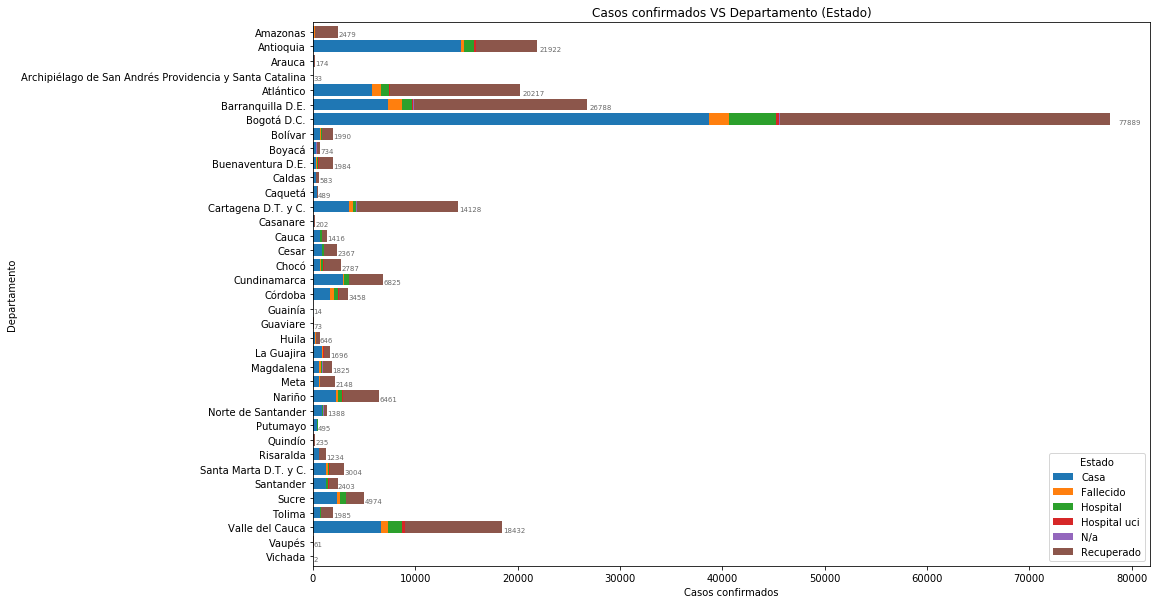

In [13]:
ax = data.groupby(['Departamento', 'Estado']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Estado)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers_H(div)

### - Casos confirmados VS Estado (Sexo)

In [14]:
data.groupby(['Estado', 'Sexo']).size().unstack().fillna(0)

Sexo              F      M
Estado                    
Casa          46335  50994
Fallecido      2935   5040
Hospital       5286   7099
Hospital uci    534    980
N/a             202    272
Recuperado    53243  60621

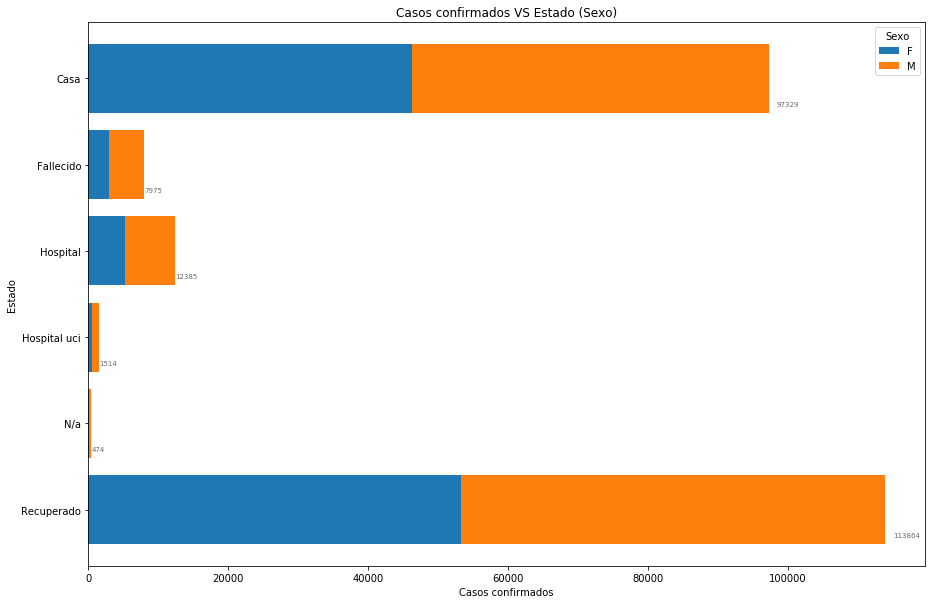

In [15]:
ax = data.groupby(['Estado', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Estado (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Estado (Clasificación de edad)

In [16]:
data.groupby(['Estado', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Estado                                                                       
Casa                     3859     7343    24497    24325    15858    11949   
Fallecido                  14       17      115      280      648     1225   
Hospital                  472      273     1016     1600     1916     2604   
Hospital uci               57       25       54      162      214      369   
N/a                        13        9       22       19       39       54   
Recuperado               5358     9966    28342    27391    17849    13576   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Estado                                                       
Casa                      5831     2472     1023        172  
Fallecido                 1878     1976     1478        344  
Hospital                  2243     1450      709        102  
Hospital uci               342      218       68          5  
N/a                         92      104       95         27  
Recuperado                6907     3089     1194        192

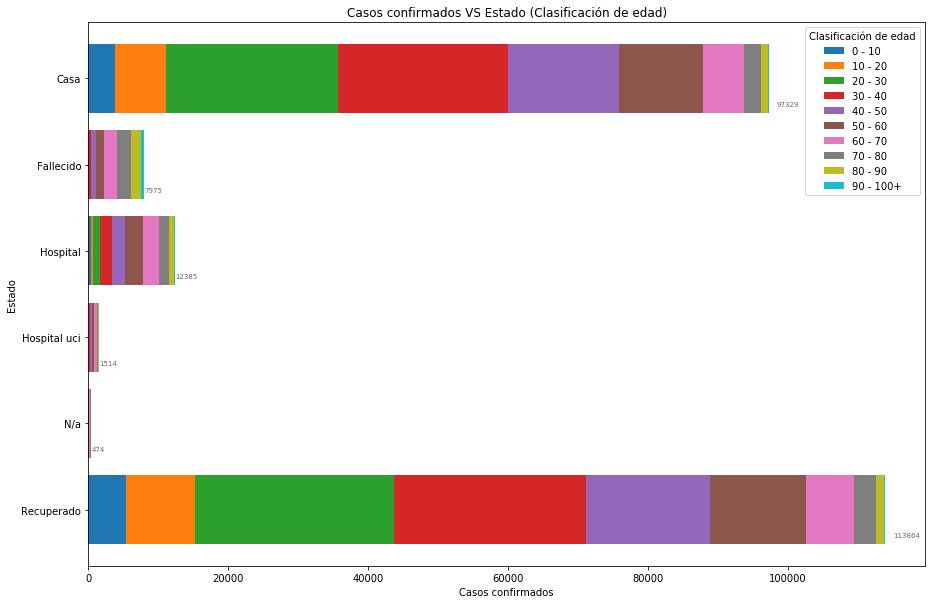

In [17]:
ax = data.groupby(['Estado', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Estado (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Tipo de contagio (Sexo)

In [18]:
data.groupby(['Tipo', 'Sexo']).size().unstack().fillna(0)

Sexo              F       M
Tipo                       
En estudio   102412  111736
Importado       453     516
Relacionado    5670   12754

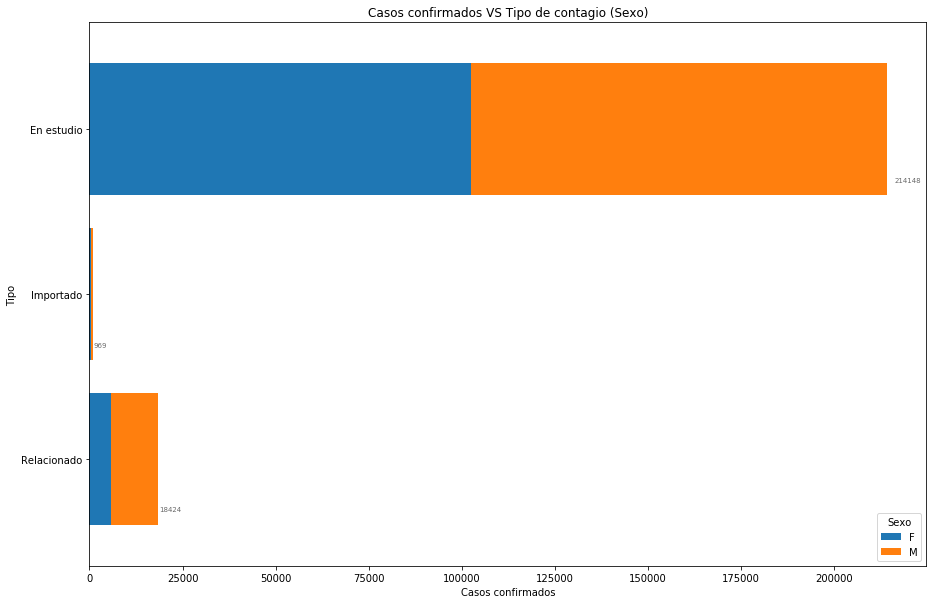

In [19]:
ax = data.groupby(['Tipo', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Tipo de contagio (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Tipo (Clasificación de edad)

In [20]:
data.groupby(['Tipo', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Tipo                                                                         
En estudio               8923    15228    48691    49167    33995    27895   
Importado                   6       36      239      228      172      149   
Relacionado               844     2369     5116     4382     2357     1733   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Tipo                                                         
En estudio               16314     8836     4318        781  
Importado                   94       35        9          1  
Relacionado                885      438      240         60

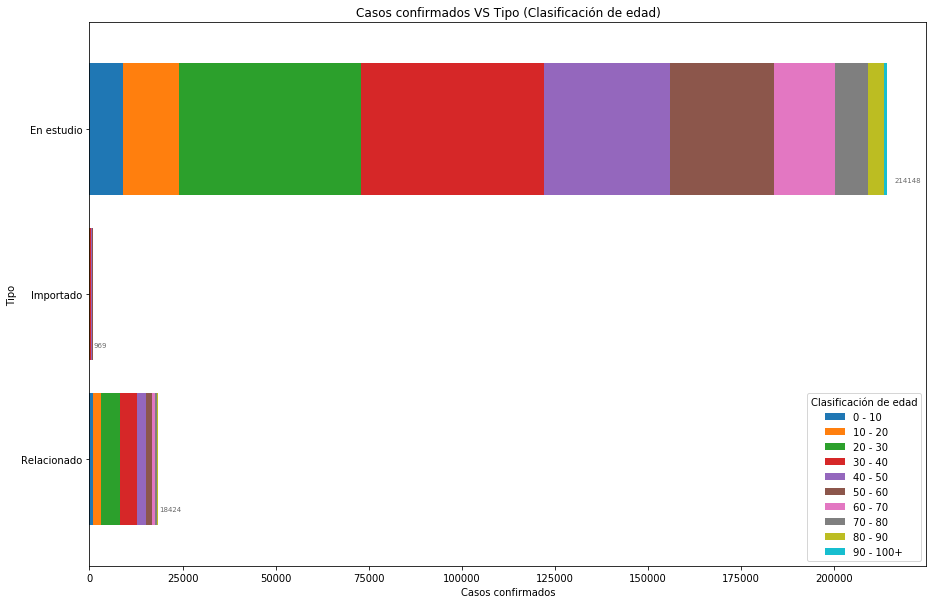

In [21]:
ax = data.groupby(['Tipo', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Tipo (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Clasificación de edad (Sexo)

In [22]:
data.groupby(['Clasificación de edad', 'Sexo']).size().unstack().fillna(0)

Sexo                       F      M
Clasificación de edad              
0 - 10                  4864   4909
10 - 20                 8119   9514
20 - 30                25505  28541
30 - 40                24489  29288
40 - 50                17019  19505
50 - 60                13673  16104
60 - 70                 7929   9364
70 - 80                 4204   5105
80 - 90                 2240   2327
90 - 100+                493    349

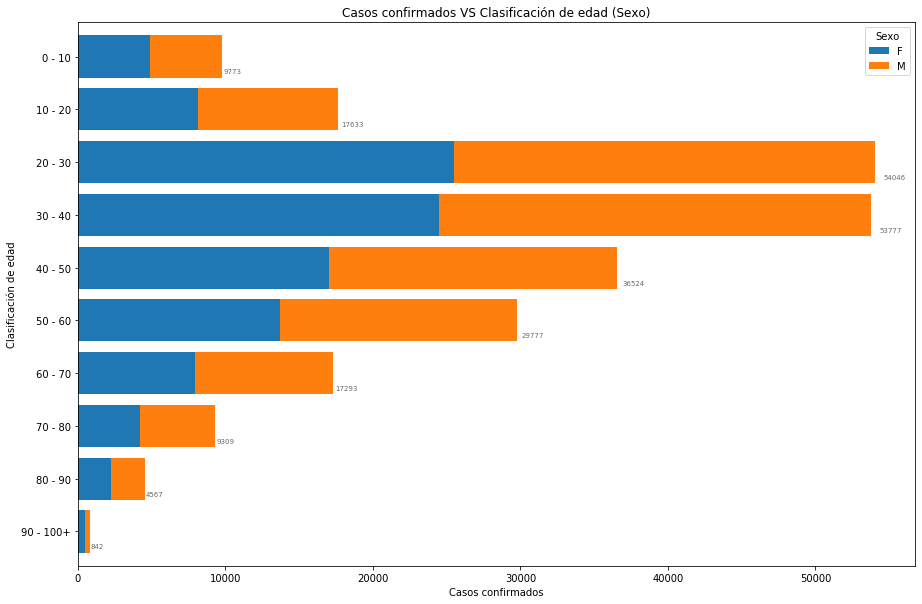

In [23]:
ax = data.groupby(['Clasificación de edad', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Clasificación de edad (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Clasificación de edad (Estado)

In [24]:
data.groupby(['Clasificación de edad', 'Estado']).size().unstack().fillna(0)

Estado                  Casa  Fallecido  Hospital  Hospital uci  N/a  \
Clasificación de edad                                                  
0 - 10                  3859         14       472            57   13   
10 - 20                 7343         17       273            25    9   
20 - 30                24497        115      1016            54   22   
30 - 40                24325        280      1600           162   19   
40 - 50                15858        648      1916           214   39   
50 - 60                11949       1225      2604           369   54   
60 - 70                 5831       1878      2243           342   92   
70 - 80                 2472       1976      1450           218  104   
80 - 90                 1023       1478       709            68   95   
90 - 100+                172        344       102             5   27   

Estado                 Recuperado  
Clasificación de edad              
0 - 10                       5358  
10 - 20                      9966  
20 - 30                     28342  
30 - 40                     27391  
40 - 50                     17849  
50 - 60                     13576  
60 - 70                      6907  
70 - 80                      3089  
80 - 90                      1194  
90 - 100+                     192

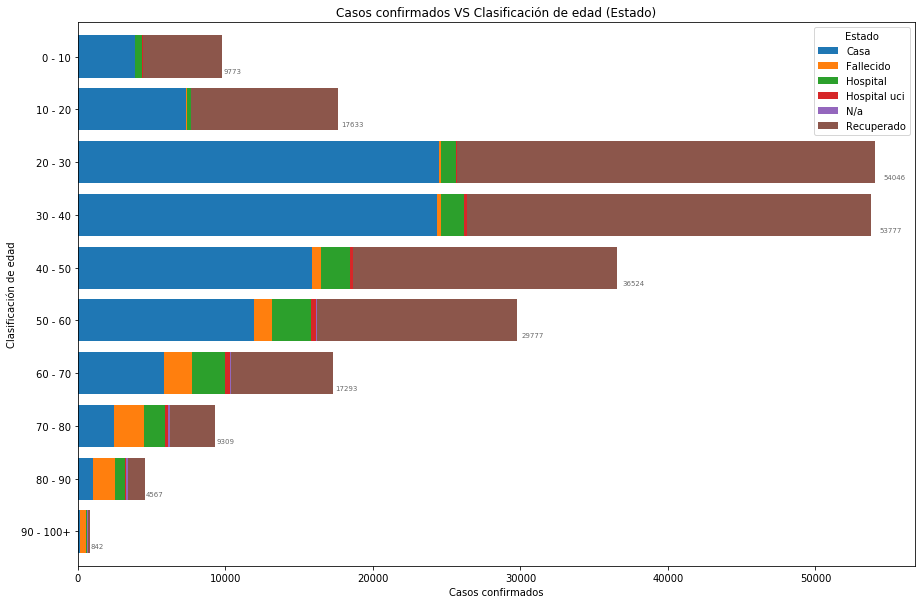

In [25]:
ax = data.groupby(['Clasificación de edad', 'Estado']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Clasificación de edad (Estado)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers_H(div)

### - Casos confirmados VS Fecha de diagnóstico (Sexo)

In [26]:
data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0)

Sexo                       F       M
Fecha de diagnóstico                
2020-03-06               1.0     0.0
2020-03-09               1.0     1.0
2020-03-11               4.0     2.0
2020-03-12               5.0     0.0
2020-03-13               2.0     3.0
...                      ...     ...
2020-07-20            2594.0  3015.0
2020-07-21            3672.0  4188.0
2020-07-22            4163.0  5032.0
2020-07-23            2189.0  2318.0
2020-07-24             247.0   218.0

[138 rows x 2 columns]

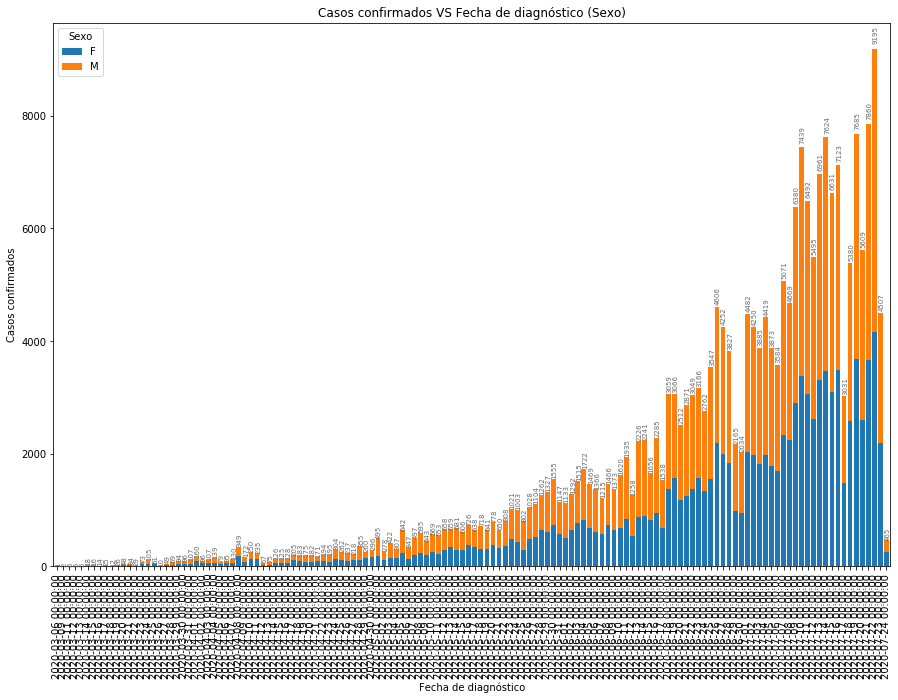

In [27]:
ax = data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Sexo)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Clasificación de edad)

In [28]:
data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Fecha de diagnóstico                                                         
2020-03-06                  0        1        0        0        0        0   
2020-03-09                  0        0        0        1        1        0   
2020-03-11                  0        0        4        0        0        1   
2020-03-12                  0        0        0        1        1        1   
2020-03-13                  0        0        1        0        2        0   
...                       ...      ...      ...      ...      ...      ...   
2020-07-20                237      394     1187     1281      916      749   
2020-07-21                290      509     1901     1841     1294      989   
2020-07-22                300      620     2190     2107     1445     1255   
2020-07-23                165      302      986     1037      706      586   
2020-07-24                 13       28      127      133       64       59   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Fecha de diagnóstico                                         
2020-03-06                   0        0        0          0  
2020-03-09                   0        0        0          0  
2020-03-11                   0        0        1          0  
2020-03-12                   1        1        0          0  
2020-03-13                   2        0        0          0  
...                        ...      ...      ...        ...  
2020-07-20                 471      238      107         29  
2020-07-21                 549      284      174         29  
2020-07-22                 703      372      171         32  
2020-07-23                 374      221      114         16  
2020-07-24                  24       12        4          1  

[138 rows x 10 columns]

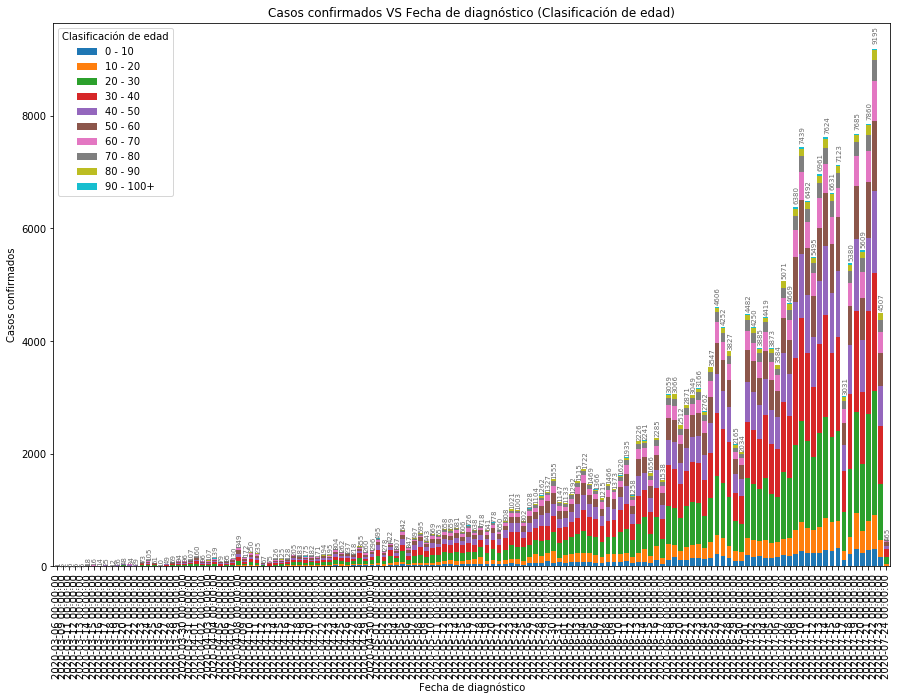

In [29]:
ax = data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Estado)

In [30]:
data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0)

Estado                  Casa  Fallecido  Hospital  Hospital uci  N/a  \
Fecha de diagnóstico                                                   
2020-03-06               0.0        0.0       0.0           0.0  0.0   
2020-03-09               0.0        0.0       0.0           0.0  0.0   
2020-03-11               0.0        0.0       0.0           0.0  0.0   
2020-03-12               0.0        0.0       0.0           0.0  0.0   
2020-03-13               0.0        0.0       0.0           0.0  0.0   
...                      ...        ...       ...           ...  ...   
2020-07-20            4977.0      108.0     493.0          22.0  5.0   
2020-07-21            7254.0      131.0     421.0          50.0  3.0   
2020-07-22            8302.0      171.0     653.0          62.0  7.0   
2020-07-23            3969.0        7.0     489.0          42.0  0.0   
2020-07-24             439.0        0.0      24.0           2.0  0.0   

Estado                Recuperado  
Fecha de diagnóstico              
2020-03-06                   1.0  
2020-03-09                   2.0  
2020-03-11                   6.0  
2020-03-12                   5.0  
2020-03-13                   5.0  
...                          ...  
2020-07-20                   4.0  
2020-07-21                   1.0  
2020-07-22                   0.0  
2020-07-23                   0.0  
2020-07-24                   0.0  

[138 rows x 6 columns]

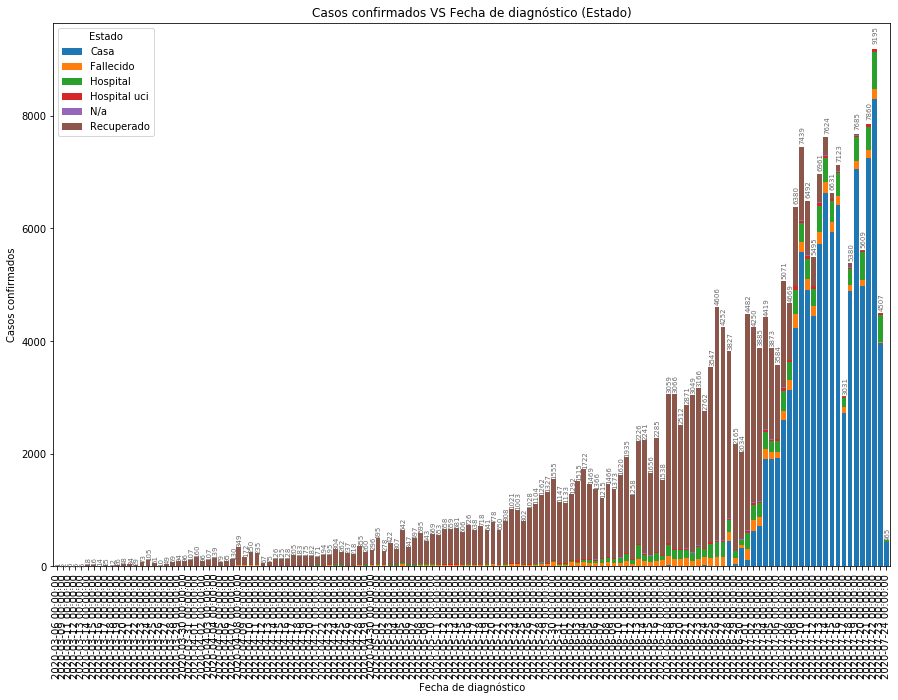

In [31]:
ax = data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Estado)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Sexo)

In [32]:
data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).cumsum()

Sexo                         F         M
Fecha de diagnóstico                    
2020-03-06                 1.0       0.0
2020-03-09                 2.0       1.0
2020-03-11                 6.0       3.0
2020-03-12                11.0       3.0
2020-03-13                13.0       6.0
...                        ...       ...
2020-07-20             96487.0  111257.0
2020-07-21            100159.0  115445.0
2020-07-22            104322.0  120477.0
2020-07-23            106511.0  122795.0
2020-07-24            106758.0  123013.0

[138 rows x 2 columns]

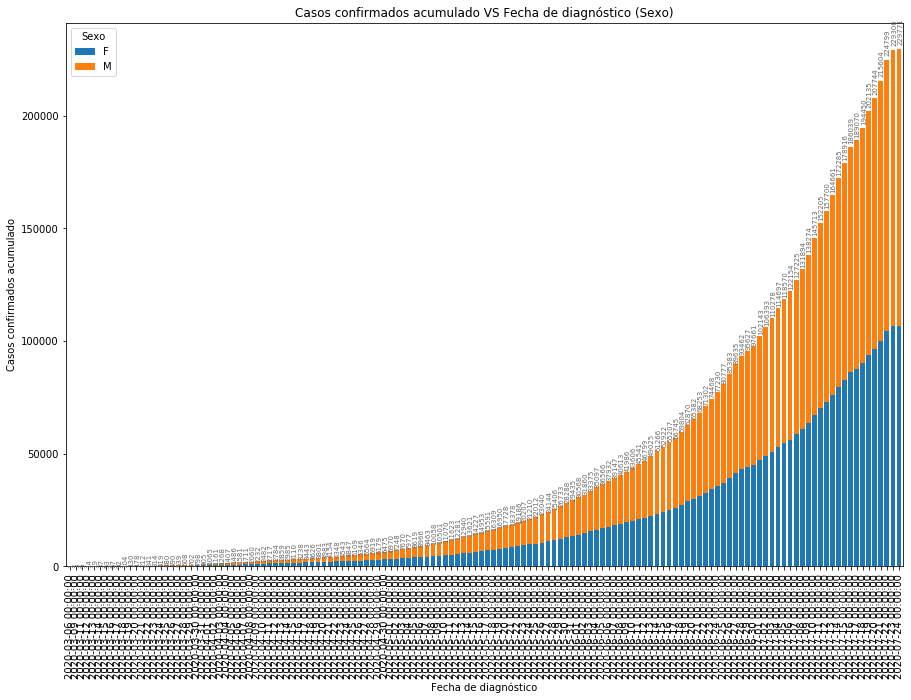

In [33]:
ax = data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulado VS Fecha de diagnóstico (Sexo)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Clasificación de edad)

In [34]:
data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).cumsum()

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Fecha de diagnóstico                                                         
2020-03-06                  0        1        0        0        0        0   
2020-03-09                  0        1        0        1        1        0   
2020-03-11                  0        1        4        1        1        1   
2020-03-12                  0        1        4        2        2        2   
2020-03-13                  0        1        5        2        4        2   
...                       ...      ...      ...      ...      ...      ...   
2020-07-20               8874    15899    47944    47752    32460    26427   
2020-07-21               9164    16408    49845    49593    33754    27416   
2020-07-22               9464    17028    52035    51700    35199    28671   
2020-07-23               9629    17330    53021    52737    35905    29257   
2020-07-24               9642    17358    53148    52870    35969    29316   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Fecha de diagnóstico                                         
2020-03-06                   0        0        0          0  
2020-03-09                   0        0        0          0  
2020-03-11                   0        0        1          0  
2020-03-12                   1        1        1          0  
2020-03-13                   3        1        1          0  
...                        ...      ...      ...        ...  
2020-07-20               15352     8262     4020        754  
2020-07-21               15901     8546     4194        783  
2020-07-22               16604     8918     4365        815  
2020-07-23               16978     9139     4479        831  
2020-07-24               17002     9151     4483        832  

[138 rows x 10 columns]

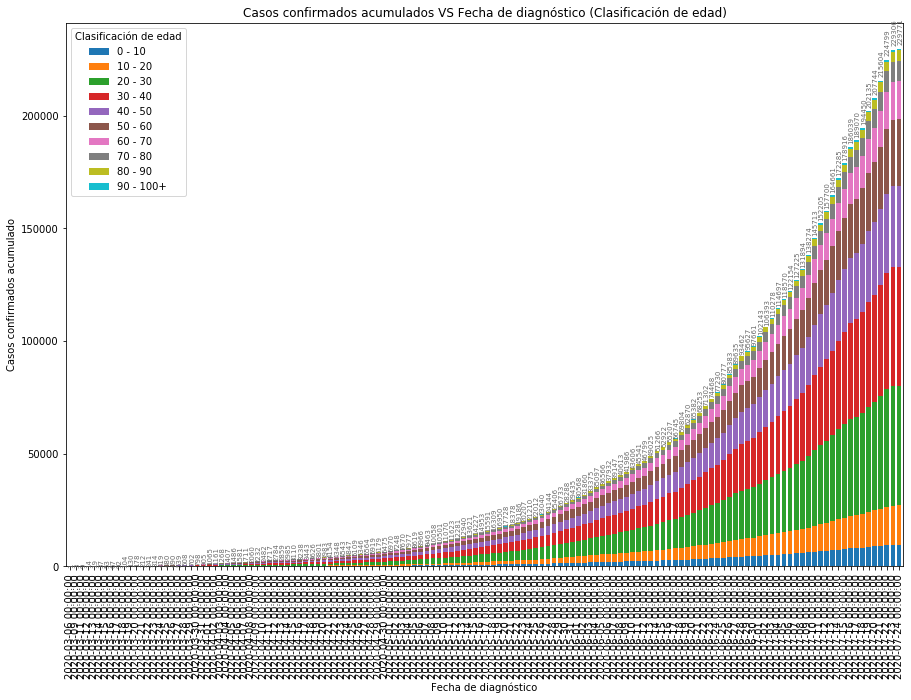

In [35]:
ax = data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulados VS Fecha de diagnóstico (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Estado)

In [36]:
data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).cumsum()

Estado                   Casa  Fallecido  Hospital  Hospital uci    N/a  \
Fecha de diagnóstico                                                      
2020-03-06                0.0        0.0       0.0           0.0    0.0   
2020-03-09                0.0        0.0       0.0           0.0    0.0   
2020-03-11                0.0        0.0       0.0           0.0    0.0   
2020-03-12                0.0        0.0       0.0           0.0    0.0   
2020-03-13                0.0        0.0       0.0           0.0    0.0   
...                       ...        ...       ...           ...    ...   
2020-07-20            77312.0     7495.0   10645.0        1324.0  445.0   
2020-07-21            84566.0     7626.0   11066.0        1374.0  448.0   
2020-07-22            92868.0     7797.0   11719.0        1436.0  455.0   
2020-07-23            96837.0     7804.0   12208.0        1478.0  455.0   
2020-07-24            97276.0     7804.0   12232.0        1480.0  455.0   

Estado                Recuperado  
Fecha de diagnóstico              
2020-03-06                   1.0  
2020-03-09                   3.0  
2020-03-11                   9.0  
2020-03-12                  14.0  
2020-03-13                  19.0  
...                          ...  
2020-07-20              110523.0  
2020-07-21              110524.0  
2020-07-22              110524.0  
2020-07-23              110524.0  
2020-07-24              110524.0  

[138 rows x 6 columns]

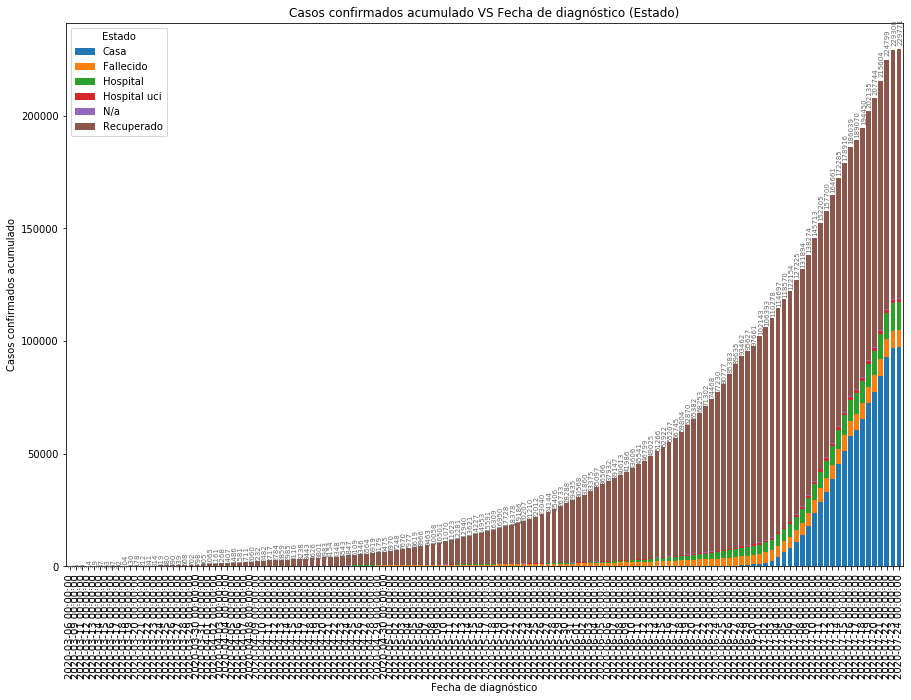

In [37]:
ax = data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulado VS Fecha de diagnóstico (Estado)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Estado'].unique())
numbers(div)

## #StayHome #QuédateEnCasa

### Made with ♥ by <a href='https://github.com/jlcadavid'>@jlcadavid</a>